In [6]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Dense, Flatten
import numpy as np
import cv2
from keras import backend as K
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.optimizers import SGD


In [7]:
(trainX, trainY), (testX, testY) = cifar10.load_data()
trainX = trainX.astype('float') / 255.0
testX = testX.astype('float') / 255.0

trainY = trainY.ravel()
testY = testY.ravel()

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [8]:
class MiniVGGNet:
   def build(width, height, depth, classes):
       model = Sequential()
       input_shape = (height, width, depth)
       model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
       model.add(Activation('relu'))
       model.add(BatchNormalization(axis=-1))
       model.add(Conv2D(32, (3, 3), padding="same"))
       model.add(Activation("relu"))
       model.add(BatchNormalization(axis=-1))
       model.add(MaxPool2D(pool_size=(2, 2)))
       model.add(Dropout(0.25))

       model.add(Conv2D(64, (3, 3), padding="same"))
       model.add(Activation("relu"))
       model.add(BatchNormalization(axis=-1))
       model.add(Conv2D(64, (3, 3), padding="same"))
       model.add(Activation("relu"))
       model.add(BatchNormalization(axis=-1))
       model.add(MaxPool2D(pool_size=(2, 2)))
       model.add(Dropout(0.25))

       model.add(Flatten())
       model.add(Dense(512))
       model.add(Activation("relu"))
       model.add(BatchNormalization())
       model.add(Dropout(0.5))
       model.add(Dense(classes))
       model.add(Activation("softmax"))

       return model

model = MiniVGGNet.build(width=32, height=32, depth=3, classes=10)
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,171,178 (8.28 MB)

 Trainable params: 2,169,770 (8.28 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [9]:
opt = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=64, epochs=40, verbose=1)

Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.3716 - loss: 2.0016 - val_accuracy: 0.5393 - val_loss: 1.3458
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5806 - loss: 1.2201 - val_accuracy: 0.6180 - val_loss: 1.0787
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.6440 - loss: 1.0242 - val_accuracy: 0.6811 - val_loss: 0.9164
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6899 - loss: 0.8908 - val_accuracy: 0.7080 - val_loss: 0.8411
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7189 - loss: 0.8084 - val_accuracy: 0.7237 - val_loss: 0.7696
Epoch 6/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7399 - loss: 0.7421 - val_accuracy: 0.7608 - val_loss: 0.6969
Epoch 7/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7583 - loss: 0.6886 - val_accuracy: 0.7689 - val_loss: 0.6712
Epoch 8/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7762 - loss: 0.6398 - val_accuracy:

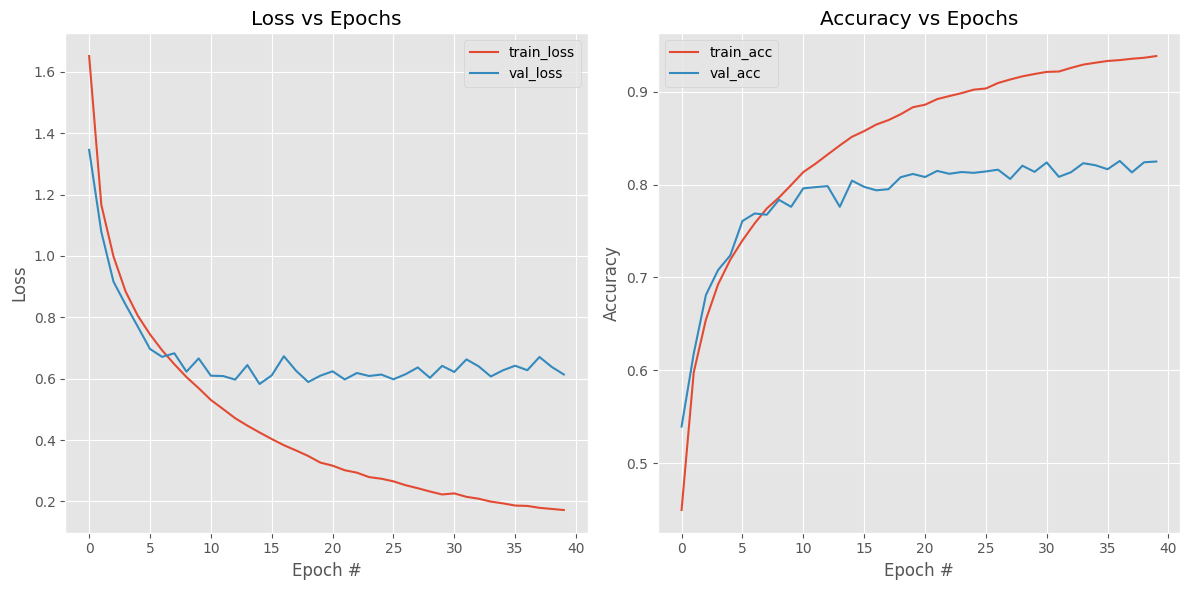

In [10]:
plt.style.use("ggplot")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.title("Loss vs Epochs")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.arange(0, 40), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_accuracy"], label="val_acc")
plt.title("Accuracy vs Epochs")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

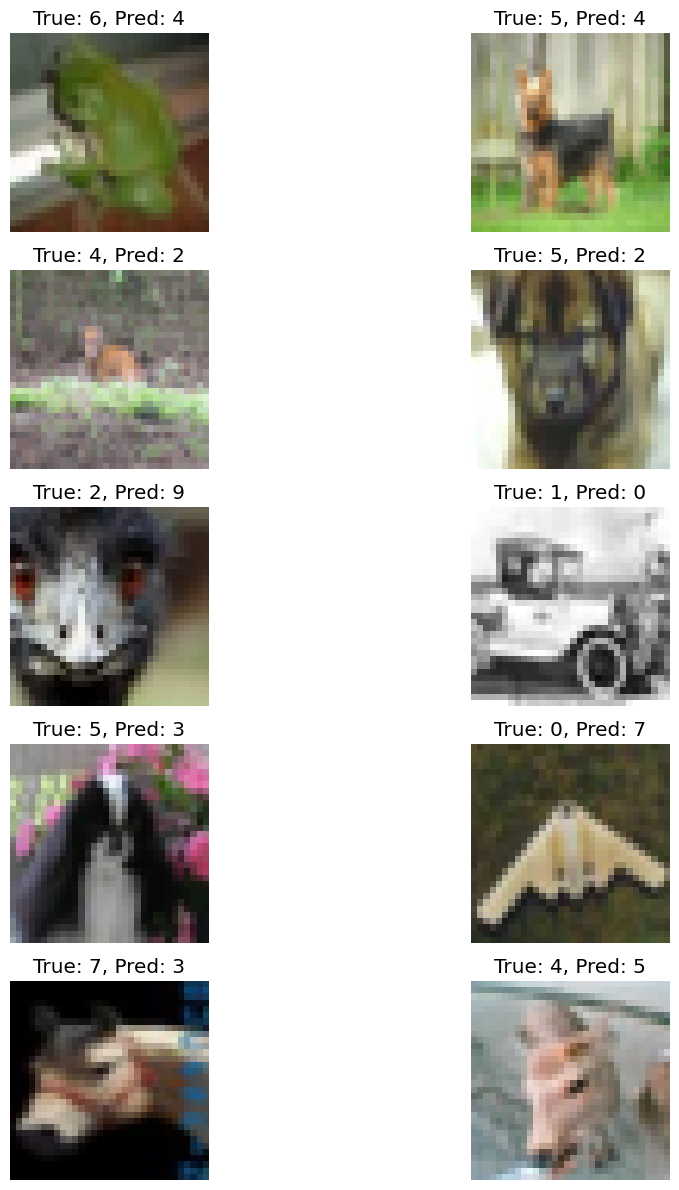

In [12]:
testY_classes = np.argmax(testY, axis=1)

incorrect_indices = np.where(predicted_classes != testY_classes)[0]

num_images = 10
plt.figure(figsize=(12, 12))

for i in range(min(num_images, len(incorrect_indices))):
    index = incorrect_indices[i]
    plt.subplot(5, 2, i+1)
    plt.imshow(testX[index])
    plt.title(f"True: {testY_classes[index]}, Pred: {predicted_classes[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
